<a href="https://colab.research.google.com/github/imbuoyp/Python-Data/blob/main/12_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

In [17]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [18]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [19]:
print(test_images.shape)
print(test_labels.shape)

(10000, 28, 28)
(10000,)


In [20]:
print(train_labels[0])

9


In [ ]:
#train_labels

In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [24]:
class_names[train_labels[0]]

'Ankle boot'

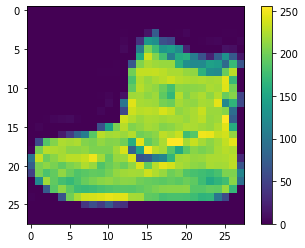

In [26]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#2차원을 1차원으로 변경하려면 reshape으로 해야 인풋으로 들어갈 수 있다 

In [27]:
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape(10000, 28*28)

In [9]:
#sequential : 딥러닝의 층 구조를 쌓을 수 있는 함수 Dense함수 : 레이어스 안에 있고, 조밀하게 모여 이쓴ㄴ 집함. 

In [28]:
from tensorflow.keras import models, layers


In [11]:
#모델디자인
#얼마나 많은 층을 사용할 것이냐는 hidden layer에서 설계하는 것-히든레이어 개수 
#각층에 얼마나 많은 유닛(퍼셉트론)을 둘 것이냐-퍼셉트론 개수
#문제 유형에 따라 출력층 어떻게 설계하느냐-출력층 설계

In [37]:
#type here 4
model = models.Sequential() 
#층 구조 생성
model.add(layers.Dense(units=512, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(units=10, activation='softmax'))
 # 내부를 구성할 수 있다.
#input_shape이 있으면 두개로 생성됨. inputlayer, hiddenlayer 로
#unit은 퍼셉트론의 개수 의미, 히든 레이어 안에  퍼셉트론이 512개 배치된다는 의미
#히든레이어에 렐루라는 활성화 함수 적용 , 인풋쉐입: 인풋레이어에 몇개를 넣는지 지정 즉 784, 
#이미지 데이터 한장은 28*28일거고 하나의 데이터 쉐입이 (784,1 )
#인풋레이어에 784개 있음

#또하나의 레이어가 생성되는데 
#layer.dense쓰면 레이어 안에 값을 구축할 수 있게 됨
#알고 싶은 값 첫 카테고리~마지막 확률값 알고 싶은것
#퍼셉트론 10개배치 
#활성화함수 소프트 맥스 다중분류문제때문에 소프트맥스 적용
#마지막 레이어가 아웃풋레이어(x1~ x10)가 됨

#히든레이어는 대부분 렐루라는 활성화함수를 사용-트렌드에 따라 바뀜
#아웃풋레이어만 함수변경됨

In [38]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [66]:

#첫행은 i-h 레이어 설명
#둘째행은 h-o레이어 설명 
#웨이트는 곱하면됨 레이어끼리
#덴스는 두번쨰열 혹은 마지막열
#input-layer x hidden-layer , h
#h x o , o
#아웃풋 쉐입 설명
#히든레이어 512개 값은 다음 레이어에 인풋으로 사용됨
#두번째 레이어도 아웃풋레이어까지 학습하고 얻는 결과는 퍼셉트론 10개니 10개일거다

In [65]:
#학습정보 설정
#옵티마이저: 오차역전파법 기법 있음
#경사하강법이라는 함수가 있는데 
#로스 : (손실함수에서)어떤함수 쓸건지 
#메트릭스:

#예측한 값을y햇이라고 함.
#인풋텐서에 대한 y값은 알고 잇음
#오차: y햇 y(결과값)의 오차를 계산해주는 손실함수를 통해 계산)loss function
#오차의w,b찾기위해 하는거
#오차를 가지고 적절한 w,b를 업데이트해서 아웃풋레이어에 
#또 w,b구해서 hidden레이어에 
#또 x로  업데이트 해나가다보면 

In [40]:
model.compile(optimizer='rmsprop', #함수의 이름
              loss='sparse_categorical_crossentropy', #함수의 이름
              metrics=['accuracy']) #정확도 측면에서 평가하겠다
              #accuracy리스트를 사용한 의미는 성능지표를 여러개 넣을 수 있다.

In [67]:
#model.fit (케라스 함수)
#을 통해 
#트레인 데이터 셋만 넣어줘야한다.
#x=인풋에 사용할 
#y값은 train데이터에 대한 라벨값 지정
#epochs 임의의 값이 들어가 있다. 웨이트 바이어스 지정된 상태에서 오차를 옵티마이저 함수 넣어서 그 결과를 다음 웨이트 바이어스
#한번 돈걸 1 epochs라고 함.
#에포크epochs는 개인이 지정

#batch_size = 128 
#인풋데이터(샘플의개수) 6만개있음 한번에 흘려보내면 다운됨
#쪼개서 보내야함. 
#6만개 샘플 수를 128개 먼저 학습시킨다는 뜻

#validation_split #20%따로 떼서 벨리데이션으로 따로 뗴겠다는 의미 
#0.2 training: 학습, test는 검증, 학습도중에 test가능함
#training set과 validation으로 나눔
#인풋텐서 흘려서 오차 계산 후 옵티마이저 가는 것.
#1번 에폭 끝났을때 트레이닝데이터만 쓰고
#업데이트 된 값 고정시키고 벨리데이션 값 흘려보내면 오차가 얼마나 되는지
#정확도가 어떻게 되는지 측정하면 모델을 비교할 수 있다.
#하나의 에폭 끝날떄마다 training set을 training, validation으로 나누는 작업해야함


In [42]:
#type 7
history = model.fit(x=train_images, y=train_labels,
                  epochs=30,
                  batch_size=128,
                  validation_split=0.2)
#q.모델핏을 써야된다는걸 어떻게 아는지
#q.벨리데이션 스플릿은 무조건 트레이닝셋 사용할떄 나눠야하는건지 궁금.

Epoch 1/30
375/375 [==============================] - 4s 11ms/step - loss: 16.1182 - accuracy: 0.7171 - val_loss: 0.7906 - val_accuracy: 0.7857
Epoch 2/30
375/375 [==============================] - 4s 10ms/step - loss: 0.7699 - accuracy: 0.8024 - val_loss: 0.6329 - val_accuracy: 0.8237
Epoch 3/30
375/375 [==============================] - 4s 10ms/step - loss: 0.6329 - accuracy: 0.8271 - val_loss: 0.5788 - val_accuracy: 0.8416
Epoch 4/30
375/375 [==============================] - 4s 10ms/step - loss: 0.5718 - accuracy: 0.8395 - val_loss: 0.6306 - val_accuracy: 0.8356
Epoch 5/30
375/375 [==============================] - 4s 10ms/step - loss: 0.5852 - accuracy: 0.8442 - val_loss: 0.5786 - val_accuracy: 0.8452
Epoch 6/30
375/375 [==============================] - 4s 10ms/step - loss: 0.5399 - accuracy: 0.8496 - val_loss: 0.5816 - val_accuracy: 0.8514
Epoch 7/30
375/375 [==============================] - 4s 10ms/step - loss: 0.5102 - accuracy: 0.8525 - val_loss: 0.6232 - val_accuracy: 0.850

In [43]:
#loss 적을수록 좋다 오차가 줄어드니까, 지속적으로 줄어드는지 확인
#step 6 시각화

#acc = histroy.histroy#(객체이름)['accuracy']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


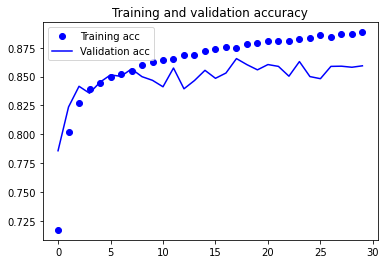

In [44]:
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

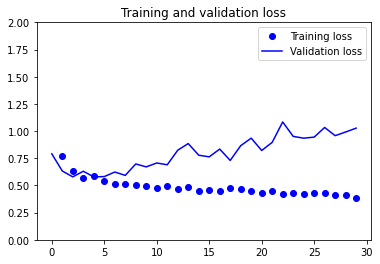

In [47]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylim(0,2)
plt.legend()

plt.show()
#로스율 주는게 맞고
#벨리데이션 로스값 0 에폭지나자 마자 오히려 증가
#오버핏이 존재하는 케이스-오버핏이잇어서 좋은 모델이 아니다 

In [49]:
#model.evaluate()
#웨이트와 바이어스 값 변경이 일어나지 않는다. 
tess_lose, test_acc = model.evaluate(x=test_images, y=test_labels)
#모델 성능평가가능함.

313/313 [==============================] - 1s 2ms/step - loss: 1.0319 - accuracy: 0.8510


In [52]:
#학습된 모델 이용 특정데이터예측-model.predict()
predict = model.predict(test_images[10].reshape((1, 28*28)))
predict
#(60000,784)이기 떄문에 리쉐이프를 한다고

array([[1.9650178e-13, 3.4663679e-09, 1.2989528e-01, 7.1526088e-15,
        8.6793166e-01, 0.0000000e+00, 2.1730617e-03, 0.0000000e+00,
        2.4745598e-11, 0.0000000e+00]], dtype=float32)

In [53]:
#softmax함수를 적용한거고 array가 열개인것은 한개 골라내는것 
#가장큰 값 각 값중 가장 큰 값을 골라내면 test값 알수잇다.
#이때 사용하는게 넘파이 아그맥스 이다.
n#p.argmaxO 가장 큰 값을 찾고 저장된 위치 인덱스를 반환한다
#라벨링 코딩 각각 값에 프리딕트 값이 들어잇을거고 넘파이 멕스로 
#클래스 네임즈 리스트와 비교하기

SyntaxError: ignored

In [59]:
result = np.argmax(predict[0])
result

4

In [61]:
print(class_names[result])

Coat


TypeError: ignored

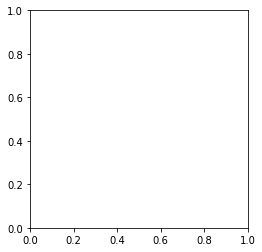

In [64]:
plt.figure()
plt.imshow(test_images[10].reshape(1,28,28), cmap=plt.cm.binary)
plt.show()